# Classification Problems With NN

Classification is a wide area of expertise of NN, we can solve from binary, multi binary and multiclass problems, on this type of problems the number of **Neurons** in the output layer will depend on the requrirements of the model itself, also the activation function will change, most of the times it will be a *Softmax* function, to get the probabiltie distribution from an output to be classified in a particular class

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [8]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train,X_test,X_valid = X_train/255.0, X_test/255.0,X_valid/255.0

In [11]:
X_train.dtype

dtype('float64')

In [13]:
X_train[0];

In [18]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal"
           ,"Shirt","Sneaker","Bag","Ankle Boot"]

In [19]:
classes[y_train[0]]

'Ankle Boot'

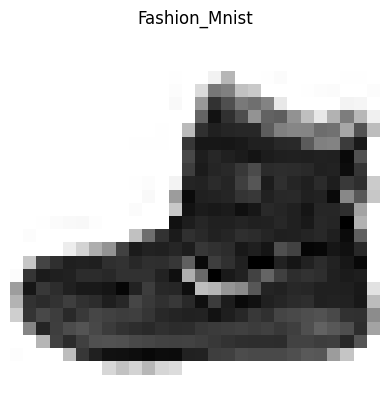

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title("Fashion_Mnist")
plt.show()

## Recalling the 2 Different methods to define Sequential Models

1. Adding layers to the Sequential "list"
2. Adding layers with the "add" method

Since this is the high level implementation by using Keras, it should the fastest but the trade off comes when models arent Sequential or the model needs more costumization

In [22]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [23]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300,activation="relu"))
model2.add(tf.keras.layers.Dense(100,activation="relu"))
model2.add(tf.keras.layers.Dense(10,activation="softmax"))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Accesing Model info

In [26]:
model1.layers

In [27]:
len(model1.layers)

4

In [32]:
first_layer = model1.layers[1]
first_layer

In [33]:
first_layer.name

'dense'

In [34]:
weights, bias = first_layer.get_weights()

### Weights and biases 

Since we declared a random_seed and also that the weights and biases from a model must be 

randomly initialized in order to actually learn we can access to those weights and biases to 

verify that is happening before training a model that will be updated to fit the training and validation data

In [39]:
weights.shape

(784, 300)

In [38]:
bias.shape

(300,)

## Class ID's to One-Hot vector and viceversa

In Classification problems is typicall to deal with classes or One-hot vectors, so we need to know how to deal

with them to fit them correctly to the model

In [40]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

In [45]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Batch Size

Dividing the training set into batches is a good practice when GPU or CPU resources are not sufficient, when dividing the 

total of the set, the model takes one batch at a time and when finish with processing all the batches an epoch is completed,

here the default batch size is 32, so it divides 55,000 into 1719 batches of 32 images

In [46]:
history = model1.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 31s 16ms/step - loss: 0.7242 - accuracy: 0.7597 - val_loss: 0.5122 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4879 - accuracy: 0.8307 - val_loss: 0.4701 - val_accuracy: 0.8294
Epoch 3/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4418 - accuracy: 0.8437 - val_loss: 0.4259 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4174 - accuracy: 0.8538 - val_loss: 0.4010 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3963 - accuracy: 0.8609 - val_loss: 0.3992 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3801 - accuracy: 0.8656 - val_loss: 0.4051 - val_accuracy: 0.8588
Epoch 7/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3675 - accuracy: 0.8696 - val_loss: 0.3740 -

In [48]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3265 - accuracy: 0.8846


[0.3264765739440918, 0.8845999836921692]

In [50]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

NameError: name 'history' is not defined

In [54]:
X_new = X_test[:5]
pred = model1.predict(X_new)
pred.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.32, 0.  , 0.01, 0.  , 0.  , 0.  , 0.67, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [55]:
pred.shape

(5, 10)

In [58]:
y_pred = pred.argmax(axis=1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [59]:
np.array(classes)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')